# Tensorflow introduction

Tensorflow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and also used for machine learning applications such as neural networks. Here we try to introduce it using some easy elementry examples.

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.8.0'

In [3]:
 sess = tf.Session()

You can define constant in different format like:

In [4]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1)
print(node2)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


As mentioned before, tnesorflow is a C basec packages which has python interface. For calculation you should open a tensorflow session like:

In [5]:
print(sess.run([node1, node2]))

[3.0, 4.0]


For example if you want to add two number using tensorflow, you can make the data flow through operations (here addition) then you have to open a session (here by with command) and run it like:

In [6]:
node3 = tf.add(node1, node2)
print(sess.run(node3))

7.0


In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# adder_node = tf.add(a, b)
adder_node = a + b
print(sess.run(adder_node, {a: 3, b:4.5}))
print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

7.5
[3. 7.]


Or you can define more complicated precedures:

In [8]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)
adder_node = (a + b)*c
print(sess.run(adder_node, {a: 3, b:4.5, c:2}))
    

15.0


Sinse almost every Machine learning problem is based on optimization, let's try to solve an optimization problem. For this pupose assume that there are an input set "x_train" which we want to find a simple linear model <br>
$y=W\times x+b$ <br>
to predict "y_train" vector. 

In [9]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(linear_model, {x:x_train}))

[0.         0.3        0.6        0.90000004]


In [10]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(loss, {x:x_train, y:y_train}))

23.66


In [11]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)
for i in range(1000):
    sess.run(train, {x:x_train, y:y_train})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [26]:
# evaluate training accuracy
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, {x:x_train, y:y_train})
        
    curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

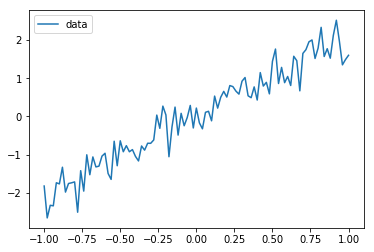

In [6]:
plt.plot(trX, trY, label='data')
# plt.plot(trX, w_init*trX + b_init, label='init')
# plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()


In [7]:
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')

/home/gf/packages/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  


In [20]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.00, b: 0.00


In [22]:
model.fit(trX, trY, nb_epoch=100, verbose=0)

/home/gf/packages/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


In [23]:
# Print trained weights
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 2.08, b: 0.09


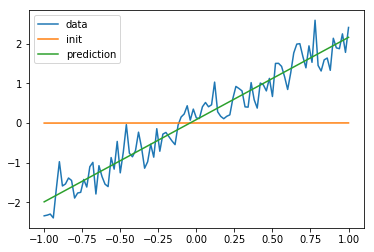

In [24]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

In [25]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

x = Input(shape=(1,))  
y = Dense(1)(x)  
model = Model(inputs=x, outputs=y)
model.compile(optimizer='sgd', loss='mse')

In [36]:
model.fit(trX, trY, nb_epoch=100, verbose=0)

/home/gf/packages/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


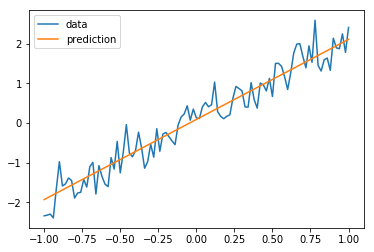

In [37]:
plt.plot(trX, trY, label='data')
plt.plot(trX, model.predict(trX), label='prediction')
plt.legend()
plt.show()

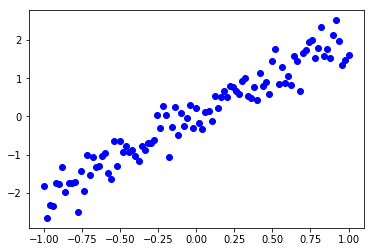

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
# initialization function: plot the background of each frame

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2, ls='--', color='red')
ax.plot(trX, trY, 'bo')

In [27]:
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    model.fit(trX, trY, nb_epoch=1, verbose=0)
    y_pred = model.predict(trX)
    line.set_data(trX, y_pred)
    return (line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
rc('animation', html='html5')


anim

/home/gf/packages/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


![](https://www.tutorialandexample.com/wp-content/uploads/2019/06/Data-flow-Graphs-and-Sessions.jpg)

![](https://www.tutorialandexample.com/wp-content/uploads/2019/06/core-component-in-the-TensorFlow.jpg)

## Gradient Descent

![](https://thisgirlreina.files.wordpress.com/2018/07/w7aro.png)

# $$x^4 - 3 \times x^3$$

In [ ]:
next_x = 6  # We start the search at x=6
gamma = 0.01  # Step size multiplier
precision = 0.00001  # Desired precision of result
max_iters = 10000  # Maximum number of iterations

# Derivative function
def df(x):
    return 4 * x**3 - 9 * x**2

for _i in range(max_iters):
    current_x = next_x
    next_x = current_x - gamma * df(current_x)

    step = next_x - current_x
    if abs(step) <= precision:
        break

print("Minimum at {}".format(next_x))

# The output for the above will be something like
# "Minimum at 2.2499646074278457"

# AND WE NEED A GOOD COMPUTER!

![](https://miro.medium.com/max/776/1*Eb4YFMdn8LJhxjJCuykiLg.png)

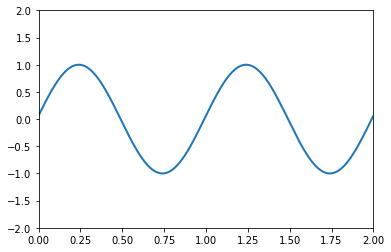